In [49]:
import pandas as pd
from datetime import datetime, timedelta, date

In [6]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

Populating the interactive namespace from numpy and matplotlib


In [7]:
# load the data into a dataframe
df = pd.read_csv('employee_retention_data.csv')

In [8]:
# inspect the data
df.head()

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaN
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


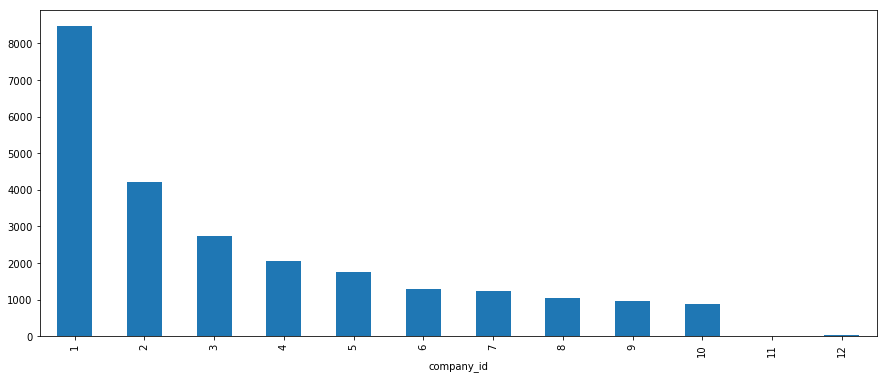

In [16]:
# count the number of employees at each company
df.groupby('company_id').employee_id.nunique().plot(kind="bar")

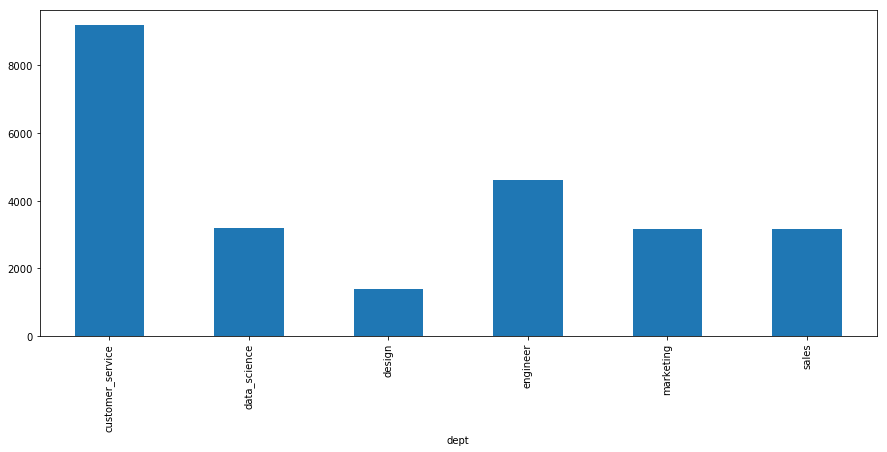

In [18]:
# plot the number of employees by department
df.groupby('dept').employee_id.count().plot(kind="bar")

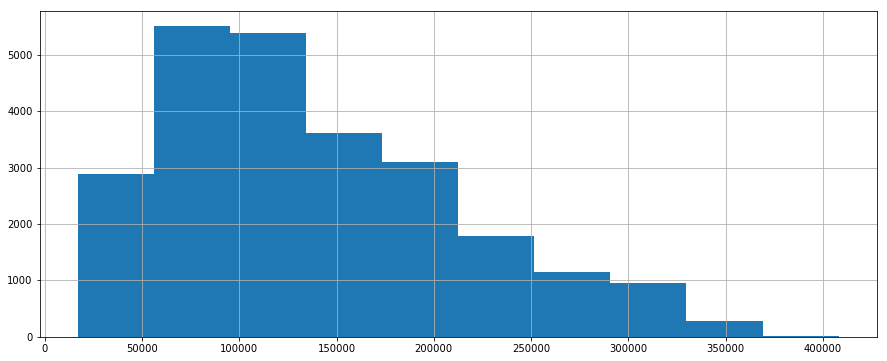

In [19]:
# plot a histogram of salary
df.salary.hist()

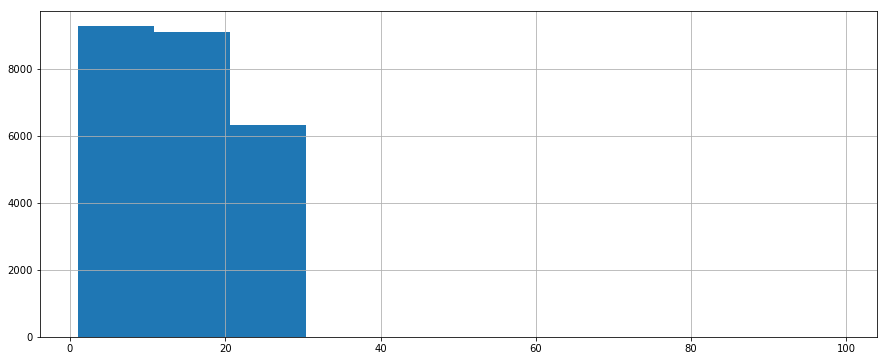

In [20]:
# plot a histogram of senority
df.seniority.hist()

In [21]:
# who are the people that have been with the company for over 40 years?
df[df.seniority >= 40]

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
24700,97289.0,10,engineer,98,266000.0,2011-12-13,2015-01-09
24701,604052.0,1,marketing,99,185000.0,2011-07-26,2013-12-06


In [22]:
# relative to the others, these people seem to be outliers so I will remove them from the dataset
df = df[df.seniority < 40]

In [45]:
# convert the dataset of a list of dicts
data = df.to_dict('records')

In [46]:
# show what the first dict looks like
data[0]

{'company_id': 7,
 'dept': 'customer_service',
 'employee_id': 13021.0,
 'join_date': '2014-03-24',
 'quit_date': '2015-10-30',
 'salary': 89000.0,
 'seniority': 28}

In [47]:
# convert join_date and quit_date to datetime object
for line in data:
    if type(line['join_date']) == str:
        line['join_date'] = datetime.strptime(line['join_date'], '%Y-%M-%d').date()
        
    if type(line['quit_date']) == str:
        line['quit_date'] = datetime.strptime(line['quit_date'], '%Y-%M-%d').date()

In [48]:
# show what the convert data looks like
data[0]

{'company_id': 7,
 'dept': 'customer_service',
 'employee_id': 13021.0,
 'join_date': datetime.date(2014, 1, 24),
 'quit_date': datetime.date(2015, 1, 30),
 'salary': 89000.0,
 'seniority': 28}

In [52]:
# find the unique companies
companies = set()
for line in data:
    companies.add(line['company_id'])

In [71]:
# create a dict of all the between start/end
d1 = date(2011,1, 24)
d2 = date(2015, 12, 13)

delta = d2 - d1

dates = {}
for i in range(delta.days + 1):
    
    dates[d1 + timedelta(days=i)] = {}
    
    for c in companies:
        dates[d1 + timedelta(days=i)][c] = 0

In [ ]:
for line in data:
    if line['quit_date'])

In [72]:
dates[list(dates.keys())[0]]

{1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}

In [74]:
# increase daily employee count for each company
for line in data:
    print(line)
    start = line['join_date']
    if type(line['quit_date']) is 
    end = line['quit_date']
    delta = end - start
    for i in range(delta.days + 1):
        dt = start + timedelta(days=i)
        dates[dt][line['company_id']] += 1

{'dept': 'customer_service', 'quit_date': datetime.date(2015, 1, 30), 'company_id': 7, 'employee_id': 13021.0, 'join_date': datetime.date(2014, 1, 24), 'seniority': 28, 'salary': 89000.0}
{'dept': 'marketing', 'quit_date': datetime.date(2014, 1, 4), 'company_id': 7, 'employee_id': 825355.0, 'join_date': datetime.date(2013, 1, 29), 'seniority': 20, 'salary': 183000.0}
{'dept': 'marketing', 'quit_date': nan, 'company_id': 4, 'employee_id': 927315.0, 'join_date': datetime.date(2014, 1, 13), 'seniority': 14, 'salary': 101000.0}


TypeError: unsupported operand type(s) for -: 'float' and 'datetime.date'